In [4]:
import sys
sys.path.append('..')

import sqlite3
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt

from src.graphbuilder import GraphBuilder

conn = sqlite3.connect('../data/raw/hackernews/csv/hackernews.sl3')
cursor = conn.cursor()

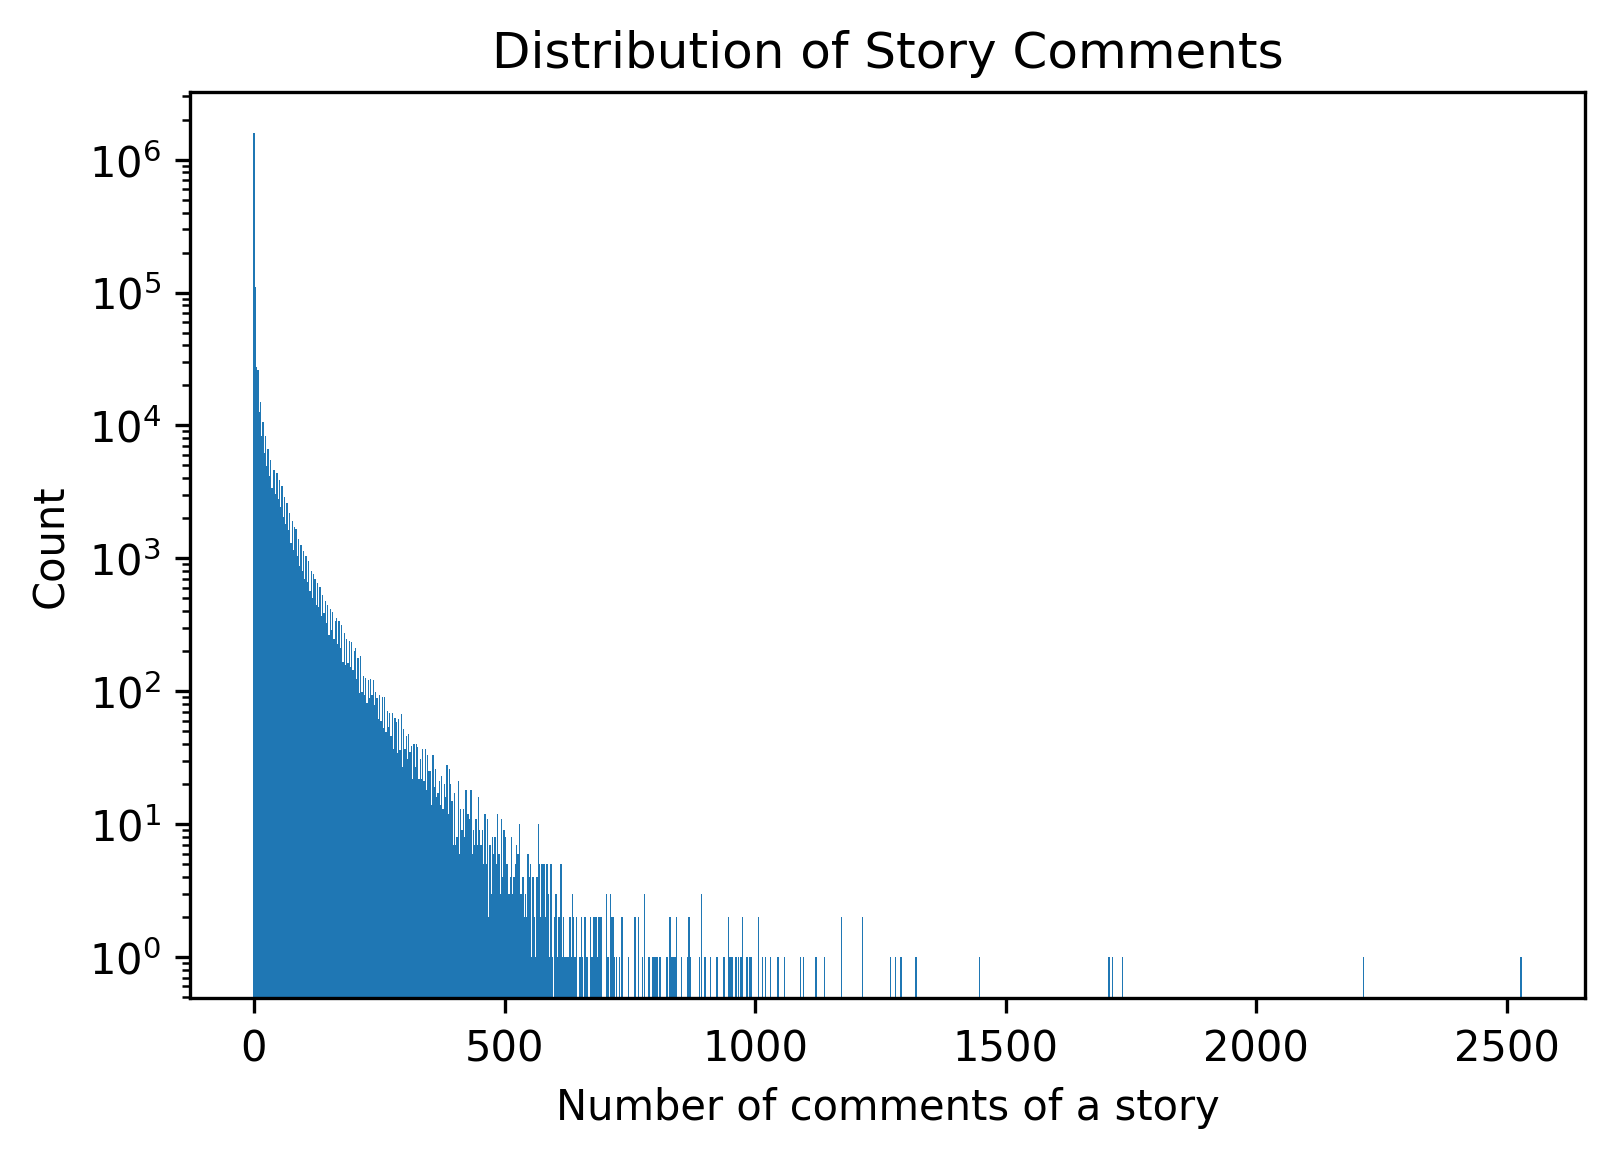

In [5]:
# Plot the distribution of comments per story

query = '''
        SELECT descendants
        FROM hackernews
        WHERE type = 'story' and descendants != ''
'''
story_comments_df = pd.read_sql_query(query, conn)
story_comments_df['descendants'] = story_comments_df['descendants'].map(lambda x: int(float(x)))
story_comments_df.hist(grid=False, bins=1000)
plt.yscale('log', nonposy='clip')
plt.xlabel('Number of comments of a story')
plt.ylabel('Count')
plt.title("Distribution of Story Comments")
plt.show()

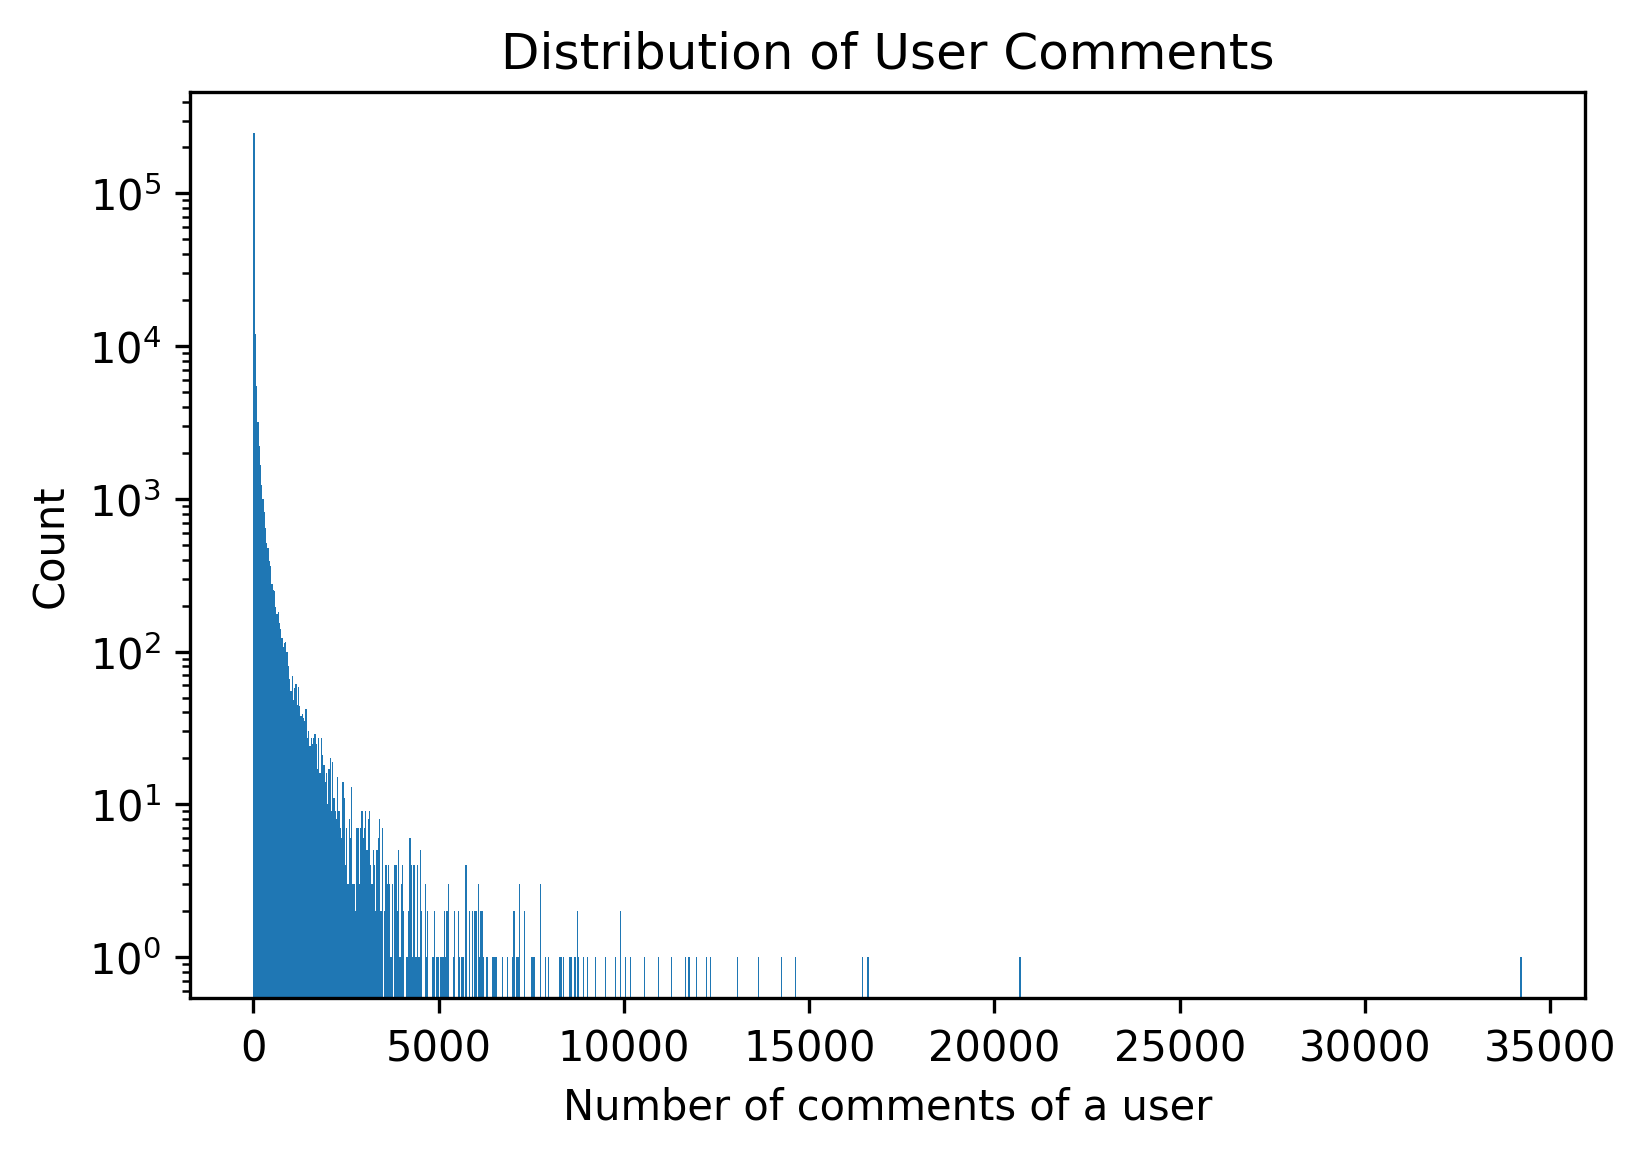

In [6]:
# Plot the distribution of comments per user

query = '''
        SELECT by, COUNT(*)
        FROM hackernews
        WHERE by != "" and type = 'comment'
        GROUP BY by
'''
user_comments_df = pd.read_sql_query(query, conn)
user_comments_df.hist(grid=False, bins=1000)
plt.yscale('log', nonposy='clip')
plt.xlabel('Number of comments of a user')
plt.ylabel('Count')
plt.title("Distribution of User Comments")
plt.show()

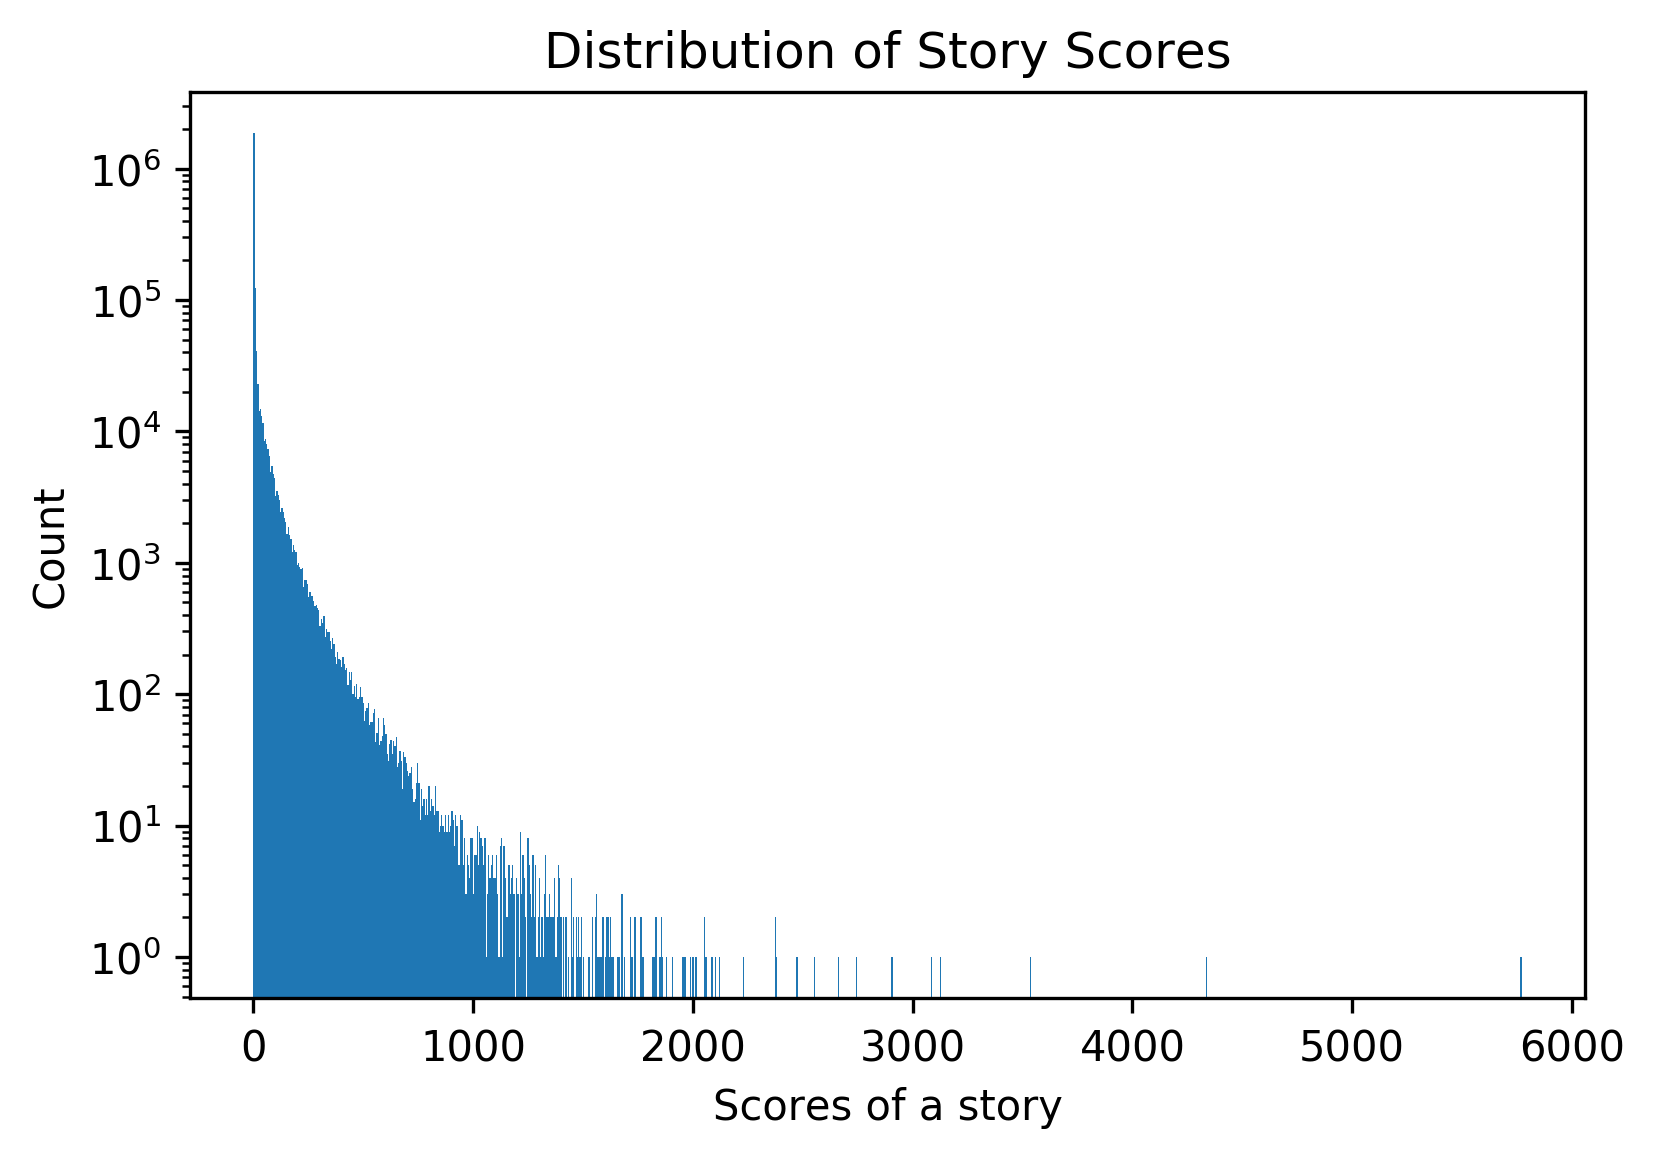

In [ ]:
# Plot the distribution of points per story

query = '''
        SELECT score,
        CAST(hackernews.score as int) as hn_score
        FROM hackernews
        WHERE type = 'story' and hn_score != ''
'''
score_df = pd.read_sql_query(query, conn)
score_df.hist(grid=False, bins=1000)
plt.yscale('log', nonposy='clip')
plt.xlabel('Scores of a story')
plt.ylabel('Count')
plt.title("Distribution of Story Scores")
plt.show()

In [ ]:
%%time
# Only filter comments that have been made to stories with at least n comments
n = 100
query = '''
        SELECT hackernews.*
        FROM hackernews JOIN (
            SELECT id,
            CAST(hackernews.descendants as int) as hn_desc,
            CAST(hackernews.id as int) as hn_id
            FROM hackernews
            WHERE by != "" and type = 'story' and hn_desc > {}
            ) t ON hackernews.parent = t.hn_id
        WHERE type = 'comment'
'''.format(n)
filtered_story_comments_df = pd.read_sql_query(query, conn)
len(filtered_story_comments_df)

In [ ]:
len(filtered_story_comments_df.by.unique())

In [ ]:
gb = GraphBuilder()

In [ ]:
gb.extend_graph(filtered_story_comments_df)

In [ ]:
gb.graph.ecount()

In [ ]:
gb.graph.vcount()

In [ ]:
gb.graph.write_graphml("../models/filtered_stories_min_{}_comments_graph.graphml".format(n))